# Calculation of model degradation time

https://ntrs.nasa.gov/api/citations/20170002430/downloads/20170002430.pdf

Some of the considerations from the previous study are used.

As a flux of 3.000 particles/cm^2(10mins)

15768.0
0.7295261975589648


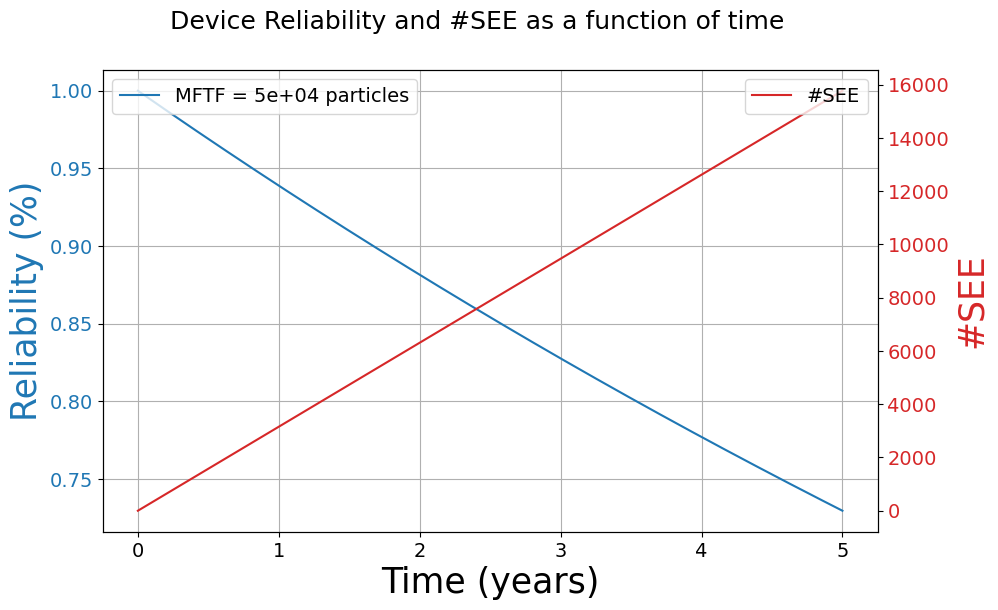

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Set global font size
plt.rcParams.update({'font.size': 25})

# Initial data
MFTF = 5 * 10**4  # Mean Time To Failure (particles)
particle_rate = 300 / 60  # particles/second/cm^2
sigma_SEE = 1 / MFTF  # SEE/particle
lambda_SEE = particle_rate * sigma_SEE  # SEE/second/cm^2
# Total time in seconds (5 years)
total_time = 5 * 365 * 24 * 3600

# Generate time points
time = np.linspace(0, total_time, 1000)  # 1000 points in the time range from 0 to 5 years

# Calculate the total number of SEE as a function of time
phi = lambda_SEE * time
print(phi[-1])
# Calculate reliability as a function of time
R = np.exp(-phi / MFTF)
print(R[-1])
# Create the plot in axis mode
fig, ax1 = plt.subplots(figsize=(10, 6))

# First plot: Reliability as a function of time
color = 'tab:blue'
ax1.set_xlabel('Time (years)', fontsize=25)
ax1.set_ylabel('Reliability (%)', color=color, fontsize=25)
ax1.plot(time / (365 * 24 * 3600), R, label=f'MFTF = {MFTF:.0e} particles', color=color)
ax1.tick_params(axis='y', labelcolor=color, labelsize=14)
ax1.tick_params(axis='x', labelsize=14)
ax1.legend(loc='upper left', fontsize=14)
ax1.grid(True)

# Second plot: #SEE as a function of time
ax2 = ax1.twinx()  # Instantiate a second axis that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('#SEE', color=color, fontsize=25)
ax2.plot(time / (365 * 24 * 3600), phi, label=f'#SEE', color=color)
ax2.tick_params(axis='y', labelcolor=color, labelsize=14)
ax2.legend(loc='upper right', fontsize=14)

# Plot title
fig.suptitle('Device Reliability and #SEE as a function of time', fontsize=18)

# Save and show the plot
# plt.savefig('reliability_numSEE.png')
plt.show()
